In [30]:
import collections
from collections import Counter

import helper
import numpy as np
import pandas as pd

%matplotlib inline
!pip install python-bidi
!pip install arabic_reshaper


from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from PIL import Image


# Create data that has the format used machine translation
My data is composed of one column and each sentence or word has its translation below
we split into 2 columns each has the Darija sentence and the other has the translation to English, then we concatenate them in one and save. it 

In [31]:

X_full = pd.read_csv('/content/data.csv', error_bad_lines=False, sep=',', encoding='utf-8')
print(X_full.head())
X_tun = X_full[X_full.index.map(lambda x: x%2==1)]
X_tun.reset_index(drop=True, inplace=True)
X_tun.rename(columns={"selection1_name": "tn"}, inplace=True)
X_en =  X_full[X_full.index.map(lambda x: x%2==0)]
X_en.reset_index(drop=True, inplace=True)
X_en.rename(columns={"selection1_name": "en"}, inplace=True)

data = pd.concat([X_en, X_tun], axis=1)
data.to_csv('pure_tunis_english_data.csv')
data

                                     selection1_name
0  Take the kid by the hand and cross the street ...
1                    شد إطفل من يدو وشق بيه إلكياس
2       He took the chair with his leg and threw it.
3                           شد إلكرسي من ساقو ورماه
4               Grab the rope well and don't let go.


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,en,tn
0,Take the kid by the hand and cross the street ...,شد إطفل من يدو وشق بيه إلكياس
1,He took the chair with his leg and threw it.,شد إلكرسي من ساقو ورماه
2,Grab the rope well and don't let go.,شد الحبل بالقوي وماتسيبوش
3,Messi got into a pattern of scoring every match.,ميسي شد الريتم متاع التسجيل في كل ماتش
4,He held to his opinion and didn't want to chan...,شد في رايو وما حبش يبدل فكرتو
...,...,...
13032,"to take a place over, colonize",إحتل مكان
13033,"change, switch",تَبْدِيلْ
13034,"underground, underneath",تَحْتِيَّة
13035,they're torturing him (cutting his fingernails...,إقُصُّولُو ضْوَافْرُو بِالكُلَّابْ


# Counting words
Slpit each sentence and count the words of each columns 

In [32]:
# Function for word count
def word_count (txt):
    return len(txt.split())

#Applying the Word Count Function to Eng & French Columns
data['En_Count'] = data['en'].apply(lambda x: word_count(x))
data['Tn_Count'] = data['tn'].apply(lambda x: word_count(x))


print( '{} English Words'.format(data['En_Count'].sum()) ) 
print('{} Tunisian Words'.format(data['Tn_Count'].sum()) )
      

#thzt is how we learnt thzt our dataset wasn't explioct!!!!!

47340 English Words
19970 Tunisian Words


# Words Distribution
We made a visualization of the Words Distribution of the two language.

In [33]:


fig = make_subplots(rows=1, cols=2, subplot_titles=("English","Tunsi"))

fig.add_trace(
    go.Histogram(x=data['En_Count'],histfunc='sum',opacity =0.8,showlegend=False,text='En'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=data['Tn_Count'],histfunc='sum', opacity =0.8,showlegend=False,text='Tn'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()




# Show a description of the data

In [34]:
data.describe()

,En_Count,Tn_Count
count,13037.000000,13037.000000
mean,3.631203,1.531794
std,2.622934,1.011216
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,1.000000
75%,5.000000,2.000000
max,24.000000,13.000000


# Check if there is a nan value in the data 


In [35]:

#Checking for Null/Missing Values
data.isna().sum()

en          0
tn          0
En_Count    0
Tn_Count    0
dtype: int64

# Word clouds
visually interpreting the density of the used word in both languages in both input and target languages

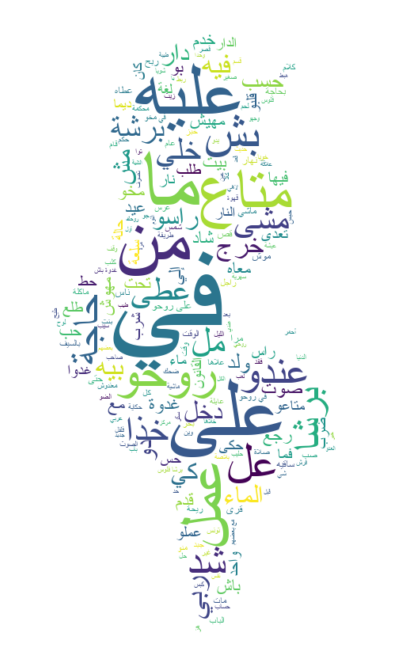

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

tun_mask = np.array(Image.open("/content/21190422.jpg"))
stpword = set(STOPWORDS)
sample_corpus=' '.join(data['tn'])
data_sample = arabic_reshaper.reshape(sample_corpus)
data_sample = get_display(data_sample) # add this  
WordCloud = WordCloud(font_path='/content/arial.ttf', 
                      background_color='white', mode='RGB', width=800, mask=tun_mask,
                      height=800,stopwords=stpword).generate(data_sample)
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

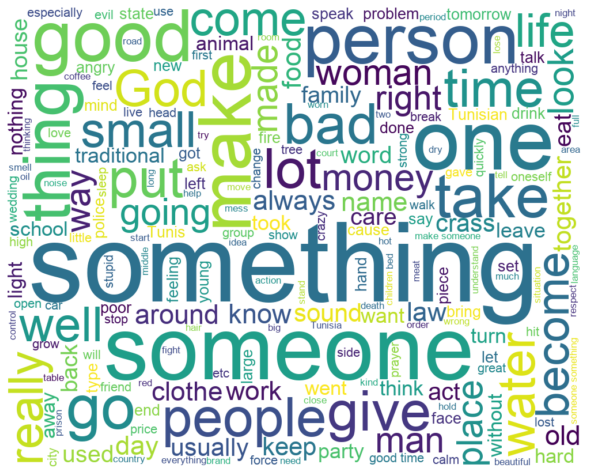

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

sample_corpus=' '.join(data['en'])
wordcloud = WordCloud(font_path='/content/arial.ttf', width = 1000, height = 800,
                background_color ='white',
                stopwords = stopwords, mode='RGB').generate(sample_corpus)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Split Data to training and validation data

In [38]:

df = pd.read_csv('/content/pure_tunis_english_data.csv')



train_data, valid_data = train_test_split(df, test_size=0.2, random_state = 42)
train_data.to_csv('train_data.csv')
valid_data.to_csv('valid_data.csv')

train = pd.read_csv('/content/train_data.csv')
valid = pd.read_csv('/content/valid_data.csv')


# Convert data to tensor 
We convert our data to tensor using tf.data.Dataset.from_tensor_slices to be readable for the model 

In [ ]:
targets = []
inputs = []

for eng in train['en']:
  targets.append(eng)
for tun in train['tn']:
  inputs.append(tun)
train_examples = tf.data.Dataset.from_tensor_slices((inputs,targets))

targets = []
inputs = []

for eng in valid['en']:
  targets.append(eng)
for tun in valid['tn']:
  inputs.append(tun)
valid_examples = tf.data.Dataset.from_tensor_slices((inputs,targets))